Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


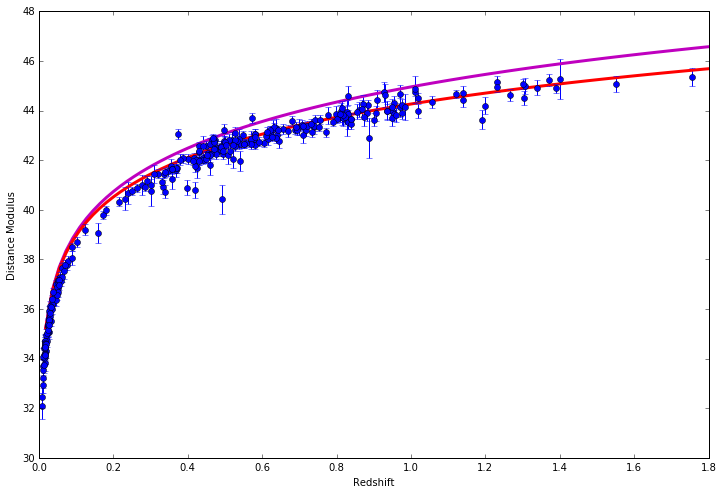

In [4]:
%pylab
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from astropy import constants as constants
from astropy import units as units
from astropy import cosmology

%matplotlib inline

# constants
OmegaM = 0.23
OmegaM2 = 1.0
OmegaL = 1.0-OmegaM
h = 0.7
ending = 1.8
steps = 100

# arrays
MU = []
MU2 = []
Dc = []
Dc2 = []

# for OmegaM = 0.23
def E(z):
    return 1.0/(np.sqrt(OmegaM*np.power((1.0+z),3.0)+OmegaL))

def f(z):
    return (3000.0/h)*E(z)

function = lambda z: f(z)

for i in range(steps):
    intEz = integrate.quad(function,0.0,ending*(i+0.0)/steps)
    Dc.append(intEz[0])

# for OmegaM = 1.0
def E2(z):
    return 1.0/(np.sqrt(OmegaM2*np.power((1.0+z),3.0)))

def f2(z):
    return (3000.0/h)*E2(z)

function = lambda z: f2(z)

for i in range(steps):
    intEz2 = integrate.quad(function,0.0,ending*(i+0.0)/steps)
    Dc2.append(intEz2[0])


z = np.linspace(0.0,ending,steps)

DL = (1.0+z)*Dc
DL2 = (1.0+z)*Dc2

MU = 25.0 - 5.0*np.log10(h) + 5.0*np.log10(DL[range(1,steps)])
MU2 = 25.0 - 5.0*np.log10(h) + 5.0*np.log10(DL2[range(1,steps)])


plt.figure(figsize=(12,8))
plt.plot(z[range(1,steps)], MU, 'm', linewidth=3, label='Theory, $\Omega_{m} = 0.23$')
plt.plot(z[range(1,steps)], MU2, 'r', linewidth=3, label='Theory, $\Omega_{m} = 1.0$')

with open("SN.dat") as textfile:
    lines = [line.split() for line in textfile]

redshift = np.zeros(290)
distMod = np.zeros(290)
sigma = np.zeros(290)

for i in range(1, 291):
    redshift[i-1] = float(lines[i][1])
    distMod[i-1] = float(lines[i][2])
    sigma[i-1] = float(lines[i][3])

plt.errorbar(redshift, distMod, yerr=sigma, fmt='-o', linestyle = 'None')
plt.xlabel('Redshift')
plt.ylabel('Distance Modulus')



# 2 DATA 

(a) The plot above looks similar to figure (6) from Riess et al.

(b) $\Omega_{m} = 1.0\ $ fits much better than $\Omega_{m} = 0.23\ $.


In [1]:
def log_func(DL1, h1):
  log_func = []
  for i in range(DL1.size):
    log_func += 25.0 - 5.0*np.log10(h1) + 5.0*np.log10(DL1[i])
  return np.array(log_func)

err_data = err_data[range(1,len(redshift))]
for i in range(len(redshift)-1):
    chi2 += np.power((distMod[i]-MU2),2.0)/np.power(sigma[i],2.0) 

NameError: name 'err_data' is not defined